# L03: Point processes

**Sources and additional reading:**
- Feigelson & Babu, chapter 3.1-3.3
- Lupton, chapter 5
- Ivezić, chapter 3.4
- image from https://indico.ijclab.in2p3.fr/event/7633/contributions/25544/attachments/18547/24832/Statistical%20methods%20-%20ISAPP%202022.pdf

## Sampling

So far we have been talking about experiments, random variables, etc. We defined the pdf which encodes information about the distribution of the parent population, and we have learned how to compute expectation values once we have the pdf. So the problem now is that in reality we do not have access to the pdf. We only have access to experiments that yield numbers where we imagine each number to be drawn from a certain underlying pdf: so instead of $f(x)$ what we get in reality are samples $x_1, ..., x_n$ from a given distribution. So what do we do in order to learn about $f(x)$?

Let's assume your friend gives you a file with data drawn from some unknown distribution. The first step you could do is to plot it and look at its histogram:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[5.09954952 4.57827248 5.20009948 ... 2.12047705 2.75024483 5.74671482]


Text(0, 0.5, 'occurrence')

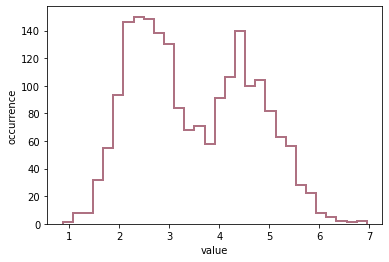

In [2]:
data = np.load('data/data.npy')

print(data)

_ = plt.hist(data, histtype='step', bins=30, color='#AE7182', linewidth=2)
plt.xlabel('value')
plt.ylabel('occurrence')

If it is enough for us to know only a set of properties of the pdf, such as its mean and variance, we can ask the question how to use the sample $x_1, ..., x_n$ to obtain estimators for these quantities. This is also useful in the case that we know the functional form of $f(x)$ and thus only need to estimate the values of the parameters that characterize it.

## Principles of point estimation

### Estimators
Let us assume that we have a set of independently and identically-distributed random variables (iids). The dataset $x_1, ..., x_n$ is assumed to be a realization of independent random variables $X_1, ..., X_n$ drawn from a common underlying pdf $f(x)$. We are interested in a parameter $\theta$ that describes a property of $f(x)$. We define the estimator $\hat{\theta}_n$ of $\theta$ through $$\hat{\theta}_n = \hat{\theta}(X_1, ..., X_n),$$ i.e. it is a function of the random variables of the underlying population and is computed from a particular realization of the population in a particular data sample.  

## Properties of estimators
Before we proceed, it is helpful to write down a number of properties that we would like our estimators to have.

**Unbiasedness:** The bias of an estimator is defined as the difference between the mean of an estimator and its true value, i.e. $$b(\hat{\theta}_n) = \langle \hat{\theta}_n \rangle - \theta.$$ An estimator is called *unbiased* if $b(\hat{\theta}_n)=0$, i.e. $\langle \hat{\theta}_n \rangle = \theta$. For some estimators that we will encounter the bias $b(\hat{\theta}_n)$ tends to zero as the sample size goes to infinity. These estimators are called *asymptotically unbiased*. 

We can consider the expectation value of the square of the difference between $\hat{\theta}_n$ and $\theta$, i.e. in all generality: $$\langle (\hat{\theta}_n - \theta)^2 \rangle = \langle (\hat{\theta}_n - \langle\hat{\theta}_n\rangle)^2 \rangle + (\langle\hat{\theta}_n\rangle-\theta)^2 = \mathrm{var}(\hat{\theta}_n)+b(\hat{\theta}_n)^2.$$ This is called the mean squared error MSE. For an unbiased estimator we have $\mathrm{MSE}=\mathrm{var}(\hat{\theta}_n)$. 

**Consistency:** An estimator is said to be consistent if it approaches the true population parameter with increasing sample size. More precisely, an estimator $\hat{\theta}_n$ is *weakly consistent* if $$P(|\hat{\theta}_n-\theta|\geq\epsilon)\to 0,$$ as $n\to \infty$ for all $\epsilon >0$. It is *strongly consistent* if $$P(\hat{\theta}_n\to\theta \; \mathrm{as} \; n\to \infty)= 1.$$ This is stronger than asymptotically unbiased as only an asymptotically unbiased estimator whose variance goes to zero for $n\to \infty$ is also consistent.

**Minimum variance unbiased estimator:** If there is a collection of different unbiased estimators for a given quantity, the most desirable one is the one that minimizes the estimator variance $\mathrm{var}(\hat{\theta}_n)$.

## Estimating the mean $\mu$ of a pdf

Let us assume that we have a sample of $n$ iids $X_1, ..., X_n$ drawn from an underlying (unknown to us) distribution function $f(x)$ with mean $\mu$ and variance $\sigma^2$. We can define the estimator $\hat{\mu}$ for the mean $\mu$ as $$\hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i,$$ i.e. we define the estimator for the population mean to be the sample mean.

*Is this estimator unbiased?* The expectation value of $\hat{\mu}$ is $$\langle \hat{\mu} \rangle = \frac{1}{n}\left \langle \sum_{i=1}^n x_i \right \rangle = \frac{1}{n} \sum_{i=1}^n \langle x_i \rangle = \mu.$$ Thus we see that the sample mean is an unbiased estimator for the true population mean.

*How precise is this estimator?* The variance of the estimator for the mean can be calculated as $$\mathrm{var}(\hat{\mu})=\left \langle \left(\frac{1}{n}\sum_{i=1}^n x_i - \mu\right)^2 \right \rangle = \frac{1}{n^2}\sum_{i=1}^n \langle(x_i - \mu)^2\rangle = \frac{n}{n^2}\sigma^2 = \frac{\sigma^2}{n}.$$ Therefore we see that for a random variable with variance $\sigma^2$, the variance of the mean estimated from a sample of size $n$ is reduced to $\mathrm{var}(\hat{\mu})= \frac{\sigma^2}{n}$. So the more data points, the better your estimate of the mean.

So from this we see that the distribution of the sample mean has a variance of $\mathrm{var}(\hat{\mu})= \frac{\sigma^2}{n}$. In the case of $X_1, ..., X_n$ being Gaussian random variables, we know that the distribution of the mean will also be Gaussian as the sum of Gaussian random variables is also Gaussian, i.e. we have $$P(\hat{\mu}|X_1, ..., X_n) = \mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}}).$$ For arbitrary distributions this does not hold, but we have the Central Limit Theorem.

**Central Limit Theorem:** The Central Limit Theorem states that given an arbitrary distribution $f(x)$ with mean $\mu$ and finite standard deviation $\sigma < \infty$, the mean of $n$ iid values $x_i$ drawn from $f(x)$ will approach a Gaussian distribution $\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$ as $n\to\infty$.

So this means that even in the case of arbitrary distributions, the pdf of the mean will tend to a Gaussian for large sample sizes, and its error will decrease as $\sqrt{n}$. This is remarkable, but the clue lies in $\sigma < \infty$.

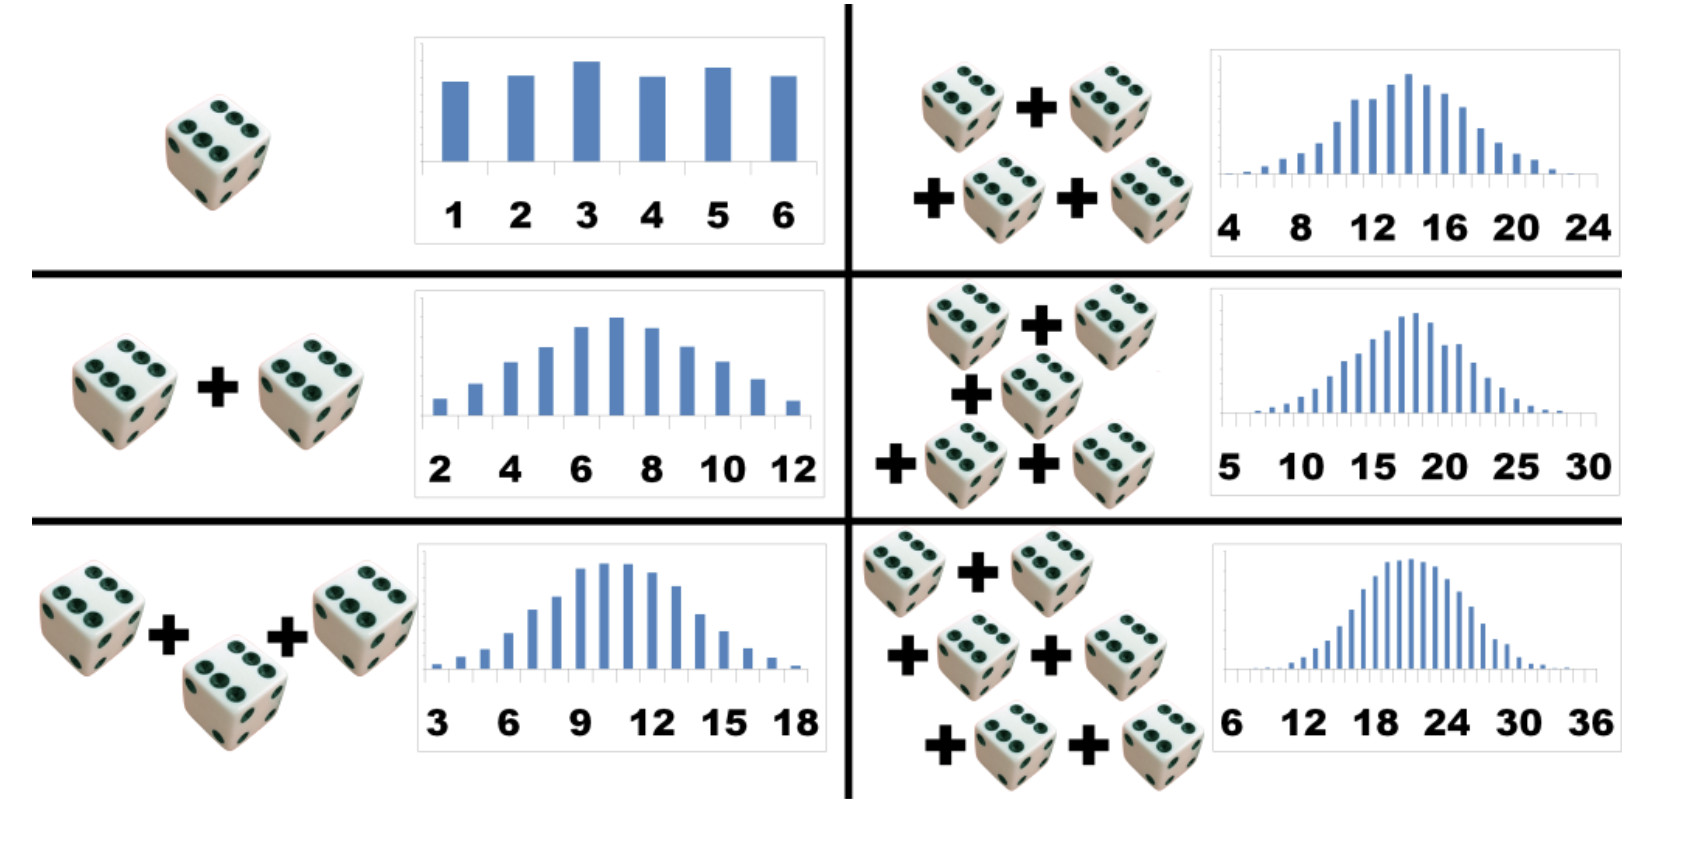

Going back to our example data set, this is very easy to do with `numpy`:

In [9]:
mean = np.mean(data)

Text(0, 0.5, 'occurrence')

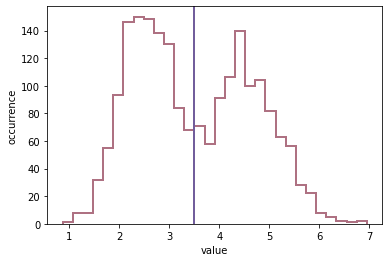

In [10]:
_ = plt.hist(data, histtype='step', bins=30, color='#AE7182', linewidth=2)
plt.axvline(x=mean, linewidth=2, color='#725e9c')
plt.xlabel('value')
plt.ylabel('occurrence')

## Estimating the variance $\sigma^2$ of a pdf

There are two different cases that we will encounter when estimating the variance of a given pdf $f(x)$:
- We know the mean $\mu$ of the distribution $f(x)$.
- We do not know the mean $\mu$ of the distribution $f(x)$.

Let us look at the first case to begin with.

### Known mean $\mu$
Let us assume that we have a sample of $n$ iids $X_1, ..., X_n$ drawn from an underlying (unknown to us) distribution function $f(x)$ with known mean $\mu$ and unknown variance $\sigma^2$. We can define the estimator $\hat{\sigma^2}$ for the variance $\sigma^2$ as $$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2,$$ i.e. we define the estimator for the population variance to be the sample variance estimated using the known mean.

*Is this estimator unbiased?* First we can rewrite the estimator as $$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2=\frac{1}{n}\sum_{i=1}^n x_i^2 - \frac{2}{n}\mu\sum_{i=1}^n x_i +\frac{1}{n}\sum_{i=1}^n\mu^2 = \frac{1}{n}\sum_{i=1}^n x_i^2-\mu^2.$$ The expectation value of $\hat{\sigma^2}$ in the case of known mean $\mu$ is then given by $$\langle \hat{\sigma^2} \rangle = \left \langle \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2 \right \rangle = \left \langle \frac{1}{n}\sum_{i=1}^n x_i^2-\mu^2 \right \rangle = \frac{1}{n}\sum_{i=1}^n \langle x_i^2 \rangle-\mu^2 = \frac{1}{n}\sum_{i=1}^n (\mu^2+\sigma^2)-\mu^2 = \sigma^2.$$ Thus we reach the important conclusion that if we know the mean of the distribution $\mu$, then the sample variance is an unbiased estimator for the population variance.

### Unknown mean $\mu$
Let us assume that we have a sample of $n$ iids $X_1, ..., X_n$ drawn from an underlying (unknown to us) distribution function $f(x)$ with unknown mean $\mu$ and unknown variance $\sigma^2$. We can define the estimator $\hat{\sigma^2}$ for the variance $\sigma^2$ using the estimator for the mean that we have derived before, i.e. $$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu})^2,$$ i.e. we define the estimator for the population variance to be the sample variance estimated using the sample mean.

*Is this estimator unbiased?* The expectation value of $\hat{\sigma^2}$ in the case of unknown mean $\mu$ is given by $$\langle \hat{\sigma^2} \rangle = \left \langle \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu})^2 \right \rangle = \left \langle \frac{1}{n}\sum_{i=1}^n x_i^2-\hat{\mu}^2 \right \rangle = \frac{1}{n}\sum_{i=1}^n \langle x_i^2 \rangle-\langle\hat{\mu}^2\rangle = \frac{1}{n}\sum_{i=1}^n (\mu^2+\sigma^2)-\left(\mu^2+\frac{\sigma^2}{n}\right) = \sigma^2-\frac{\sigma^2}{n}=\frac{n-1}{n}\sigma^2.$$ So we find that the sample variance for unknown mean is a biased estimator of the population variance. It becomes unbiased for $n\to\infty$, i.e. it is asymptotically unbiased.

In order to obtain an unbiased estimator for the population variance for all sample sizes, we can define the alternative estimator $$\hat{\sigma^2} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \hat{\mu})^2.$$

Coming back to our example data set, this is very easy to do with `numpy`:

In [11]:
std = np.std(data, ddof=1)

Text(0, 0.5, 'occurrence')

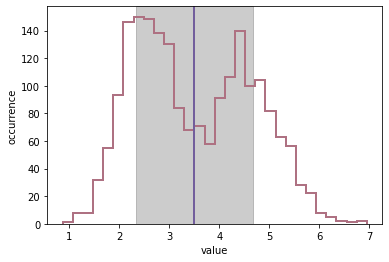

In [13]:
_ = plt.hist(data, histtype='step', bins=30, color='#AE7182', linewidth=2)
plt.axvline(x=mean, linewidth=2, color='#725e9c')
plt.axvspan(mean-std, mean+std, color='k', alpha=0.2, zorder=-1)
plt.xlabel('value')
plt.ylabel('occurrence')